In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [16]:
df = pd.read_csv('features_combined.csv')
X=df.drop(['id', 'start','end','target'], axis=1)
y = df['target']

In [17]:
# Apply ADASYN oversampling to the entire dataset
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

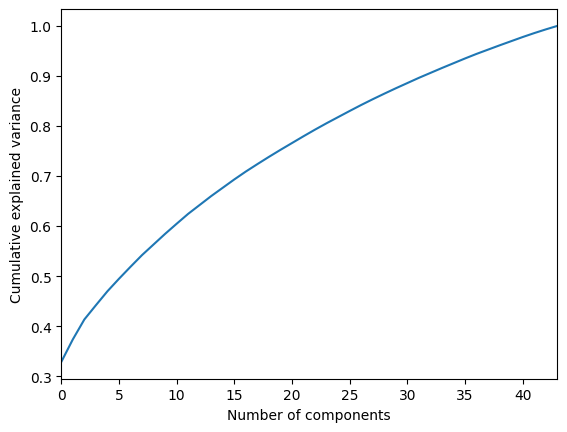

In [18]:
# create a PCA object with all components
pca = PCA()

# fit the data to the PCA object
pca.fit(X_resampled)

# plot the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim((0,43))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [19]:
# Apply PCA to the resampled dataset
pca = PCA(n_components=43)
X_pca = pca.fit_transform(X_resampled)


In [20]:
# Split the resampled and PCA-transformed dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42)

# Train a logistic regression model on the resampled and PCA-transformed training set
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Evaluate themodel on the testing set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66      4889
           1       0.67      0.71      0.69      4977

    accuracy                           0.68      9866
   macro avg       0.68      0.68      0.68      9866
weighted avg       0.68      0.68      0.68      9866



In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Evaluate the model on the testing set and get the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.676870058787756


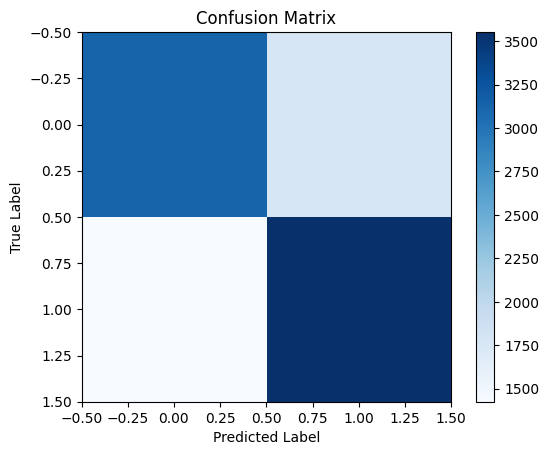

In [22]:
# Draw a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

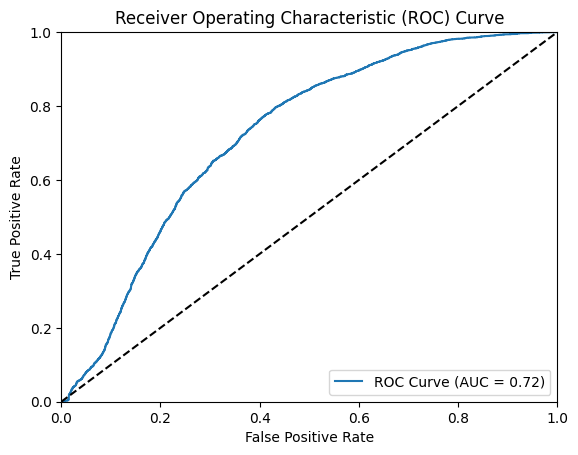

In [23]:
# Plot an ROC curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()